# Credit Rating Assessment

# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Data Overview

In [3]:
df = pd.read_csv('train.csv', index_col='company_id')

In [4]:
#df.describe().transpose()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10964 entries, 1 to 10964
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   payment_note_date                   1156 non-null   object 
 1   payment_note_amount                 3814 non-null   float64
 2   financials_date                     10964 non-null  object 
 3   financials_date-1                   10709 non-null  object 
 4   financials_date-2                   10186 non-null  object 
 5   financials_date-3                   9613 non-null   object 
 6   financials_date-4                   9007 non-null   object 
 7   revenue                             10964 non-null  int64  
 8   revenue-1                           10709 non-null  float64
 9   revenue-2                           10186 non-null  float64
 10  revenue-3                           9613 non-null   float64
 11  revenue-4                           9006 

In [6]:
df.head()

,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,revenue-2,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
company_id,,,,,,,,,,,,,,,,,,,,,
1,2014/06/12,6487.0,Aug-18,Aug-17,Aug-16,Aug-15,Aug-14,5677,8673.0,8532.0,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
2,NaN,0.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,10617,8266.0,9713.0,...,9.1,15.9,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA
3,NaN,NaN,Dec-17,NaN,NaN,NaN,NaN,7201,NaN,NaN,...,NaN,NaN,NaN,NaN,128.1,NaN,NaN,NaN,NaN,AA
4,NaN,NaN,Apr-18,Apr-17,Apr-16,Apr-15,Apr-14,22629,20668.0,24591.0,...,0.2,2.9,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A
5,2015/05/03,85539.0,Jul-18,Jul-17,Jul-16,Jul-15,Jul-14,10221,8358.0,5865.0,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA


# Missing Data

In [7]:
len(df)

10964

In [8]:
df.isnull().sum()

payment_note_date                     9808
payment_note_amount                   7150
financials_date                          0
financials_date-1                      255
financials_date-2                      778
financials_date-3                     1351
financials_date-4                     1957
revenue                                  0
revenue-1                              255
revenue-2                              778
revenue-3                             1351
revenue-4                             1958
net_sales                                0
net_sales-1                            255
net_sales-2                            778
net_sales-3                           1351
net_sales-4                           1958
profit_after_net_financial_items         0
profit_after_net_financial_items-1     255
profit_after_net_financial_items-2     778
profit_after_net_financial_items-3    1351
profit_after_net_financial_items-4    1958
profit                                   0
profit-1   

### Create dummy variable for payment_note_date

In [9]:
df['payment_note_date'] = pd.get_dummies(df['payment_note_date'].isnull(), drop_first=True)

In [10]:
df.head()

,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,revenue-2,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
company_id,,,,,,,,,,,,,,,,,,,,,
1,0,6487.0,Aug-18,Aug-17,Aug-16,Aug-15,Aug-14,5677,8673.0,8532.0,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
2,1,0.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,10617,8266.0,9713.0,...,9.1,15.9,23.1,16.8,229.0,280.7,296.1,234.0,213.0,AA
3,1,NaN,Dec-17,NaN,NaN,NaN,NaN,7201,NaN,NaN,...,NaN,NaN,NaN,NaN,128.1,NaN,NaN,NaN,NaN,AA
4,1,NaN,Apr-18,Apr-17,Apr-16,Apr-15,Apr-14,22629,20668.0,24591.0,...,0.2,2.9,0.1,1.9,97.8,89.2,82.2,72.4,92.9,A
5,0,85539.0,Jul-18,Jul-17,Jul-16,Jul-15,Jul-14,10221,8358.0,5865.0,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA


### Set NaN values of payment_note_amount to 0

In [11]:
df['payment_note_amount'] = df['payment_note_amount'].replace(to_replace=np.nan, value=0)

### Calculating mean of different feature for each Rating

In [12]:
df_mean = df.groupby('Rating').mean()

In [13]:
df_mean

,payment_note_date,payment_note_amount,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,net_sales-1,net_sales-2,...,profit_margin,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4
Rating,,,,,,,,,,,,,,,,,,,,,
A,0.859981,8135.423841,14082.714286,12828.918797,12498.462567,11954.693326,10796.289312,13883.895932,12629.932832,12319.159358,...,0.697540,7.122055,5.928556,3.657825,2.550491,192.268685,239.557343,195.814332,188.253855,167.954484
AA,0.957603,1174.674454,14598.295695,12695.806629,11561.806211,10679.515601,9770.775408,14451.779797,12523.396620,11421.004203,...,8.869089,13.441198,9.244291,7.380020,7.681723,177.851287,179.739772,189.149942,202.163085,192.184990
AAA,0.962284,1647.946480,18893.233118,17880.145115,17154.971264,15006.148454,14111.581772,18627.100216,17667.865661,16932.961566,...,15.417493,16.225359,15.316020,28.959166,17.444308,286.350862,281.637823,269.012536,264.090223,254.544633
B,0.795045,22159.434685,14480.596847,13590.133570,12683.326452,11637.336195,10975.510433,13991.575450,13083.247045,12187.698065,...,-12.426914,-0.001891,0.304774,-4.864378,-117.644623,38.786374,131.196927,183.496774,184.866667,179.578652
C,0.320721,82337.322523,12094.046847,11092.979167,9842.620253,8542.223810,7849.907609,11842.756757,10807.611742,9675.345992,...,-4.816396,2.497159,-15.833755,6.363810,1.512737,92.546486,107.398674,178.735443,164.561429,170.818157


In [14]:
def rating_mean(num, rating, feature):
    if pd.isna(num):
        if rating == 'AAA':
            return df_mean.loc['AAA'][feature]
        if rating == 'AA':
            return df_mean.loc['AA'][feature]
        if rating == 'A':
            return df_mean.loc['A'][feature]
        if rating == 'B':
            return df_mean.loc['B'][feature]
        if rating == 'C':
            return df_mean.loc['C'][feature]
    else: return num

## Replacing missing values with the mean of their Rating

In [15]:
i = 1
while i < 5:
    df[f'revenue-{i}'] = df.apply(lambda x: rating_mean(x[f'revenue-{i}'], x['Rating'], f'revenue-{i}'), axis=1)
    df[f'net_sales-{i}'] = df.apply(lambda x: rating_mean(x[f'net_sales-{i}'], x['Rating'], f'net_sales-{i}'), axis=1)
    df[f'profit_after_net_financial_items-{i}'] = df.apply(lambda x: rating_mean(x[f'profit_after_net_financial_items-{i}'], x['Rating'], f'profit_after_net_financial_items-{i}'), axis=1)
    df[f'profit-{i}'] = df.apply(lambda x: rating_mean(x[f'profit-{i}'], x['Rating'], f'profit-{i}'), axis=1)
    df[f'assets-{i}'] = df.apply(lambda x: rating_mean(x[f'assets-{i}'], x['Rating'], f'assets-{i}'), axis=1)
    df[f'lt_liabilities-{i}'] = df.apply(lambda x: rating_mean(x[f'lt_liabilities-{i}'], x['Rating'], f'lt_liabilities-{i}'), axis=1)
    df[f'equity-{i}'] = df.apply(lambda x: rating_mean(x[f'equity-{i}'], x['Rating'], f'equity-{i}'), axis=1)
    df[f'equity_ratio-{i}'] = df.apply(lambda x: rating_mean(x[f'equity_ratio-{i}'], x['Rating'], f'equity_ratio-{i}'), axis=1)
    df[f'profit_margin-{i}'] = df.apply(lambda x: rating_mean(x[f'profit_margin-{i}'], x['Rating'], f'profit_margin-{i}'), axis=1)
    df[f'cash_ratio-{i}'] = df.apply(lambda x: rating_mean(x[f'cash_ratio-{i}'], x['Rating'], f'cash_ratio-{i}'), axis=1)
    i += 1

## Find lt Liabilities 1 nan value

In [16]:
#df[df['lt_liabilities'].isnull()].transpose()

#### All the previous years the lt_liabilities was 0, convert NaN to 0

In [17]:
df['lt_liabilities'] = df['lt_liabilities'].replace(to_replace=np.nan, value=0)

In [18]:
df.loc[4070]['lt_liabilities']

0.0

## Financial Dates

In [19]:
df[['financials_date', 'financials_date-1', 'financials_date-2', 'financials_date-3', 'financials_date-4']]

,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4
company_id,,,,,
1,Aug-18,Aug-17,Aug-16,Aug-15,Aug-14
2,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13
3,Dec-17,NaN,NaN,NaN,NaN
4,Apr-18,Apr-17,Apr-16,Apr-15,Apr-14
5,Jul-18,Jul-17,Jul-16,Jul-15,Jul-14
...,...,...,...,...,...
10960,Dec-18,Dec-17,Dec-16,Dec-15,Dec-14
10961,Apr-18,NaN,NaN,NaN,NaN
10962,Jun-18,Jun-17,Jun-16,Jun-15,Jun-14


#### We can see that the financial dates are repeated features, we can drop the previous years

In [20]:
df = df.drop(['financials_date-1', 'financials_date-2', 'financials_date-3', 'financials_date-4'], axis=1)

In [21]:
df.isnull().sum()

payment_note_date                     0
payment_note_amount                   0
financials_date                       0
revenue                               0
revenue-1                             0
revenue-2                             0
revenue-3                             0
revenue-4                             0
net_sales                             0
net_sales-1                           0
net_sales-2                           0
net_sales-3                           0
net_sales-4                           0
profit_after_net_financial_items      0
profit_after_net_financial_items-1    0
profit_after_net_financial_items-2    0
profit_after_net_financial_items-3    0
profit_after_net_financial_items-4    0
profit                                0
profit-1                              0
profit-2                              0
profit-3                              0
profit-4                              0
assets                                0
assets-1                              0


In [22]:
df['financials_date'] = df['financials_date'].apply(lambda x: x[:3])

In [23]:
df['financials_date'].value_counts()

Dec    6035
Aug    1681
Apr    1505
Jun    1338
Mar      87
Sep      72
Oct      67
Feb      51
Jan      39
Jul      37
May      32
Nov      20
Name: financials_date, dtype: int64

### Fixing equity ratio, profit margin and cash ratio values

In [24]:
def fix_perc(num):
    if num > 100:
        return 100
    if num < 0:
        return 0
    else: return num

In [25]:
i = 1
while i < 5:
    df['equity_ratio'] = df['equity_ratio'].apply(fix_perc)
    df[f'equity_ratio-{i}'] = df[f'equity_ratio-{i}'].apply(fix_perc)
    df['profit_margin'] = df['profit_margin'].apply(fix_perc)
    df[f'profit_margin-{i}'] = df[f'profit_margin-{i}'].apply(fix_perc)
    df['cash_ratio'] = df['cash_ratio'].apply(fix_perc)
    df[f'cash_ratio-{i}'] = df[f'cash_ratio-{i}'].apply(fix_perc)
    i+=1

# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Rating', ylabel='count'>

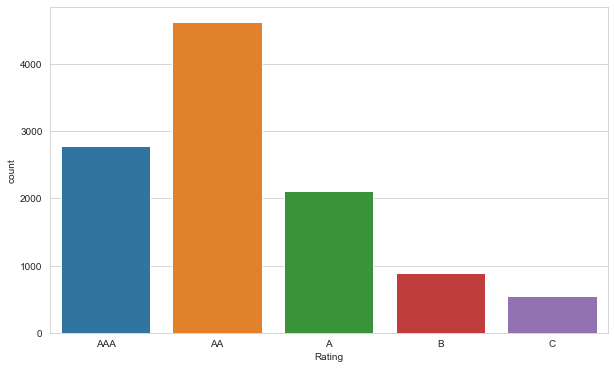

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df)

<AxesSubplot:xlabel='Rating', ylabel='count'>

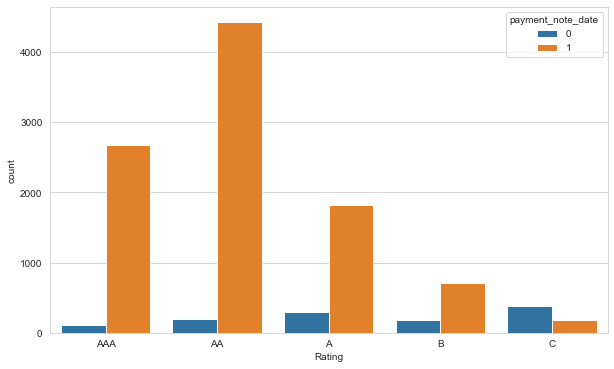

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df, hue='payment_note_date')

<AxesSubplot:xlabel='Rating', ylabel='count'>

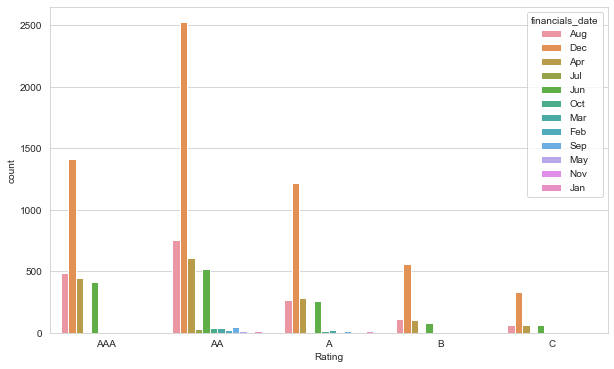

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df, hue='financials_date')

<AxesSubplot:xlabel='financials_date', ylabel='count'>

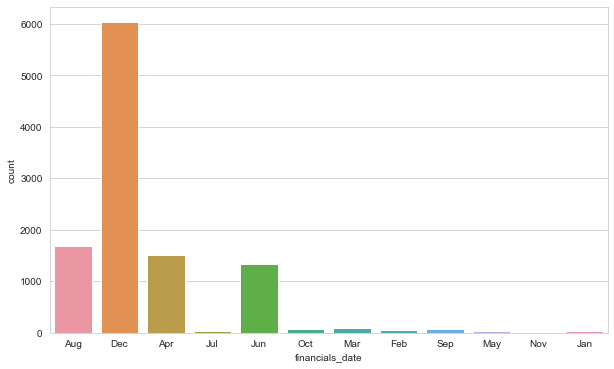

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='financials_date', data=df)

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='viridis')

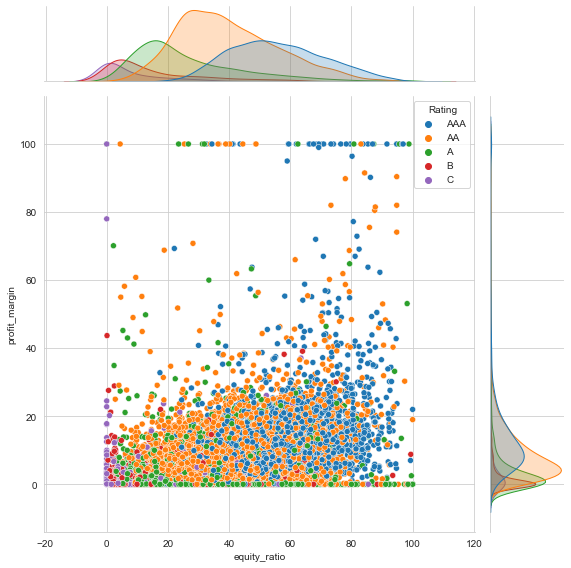

In [30]:
sns.jointplot(x='equity_ratio', y='profit_margin', data=df ,hue='Rating', height=8)

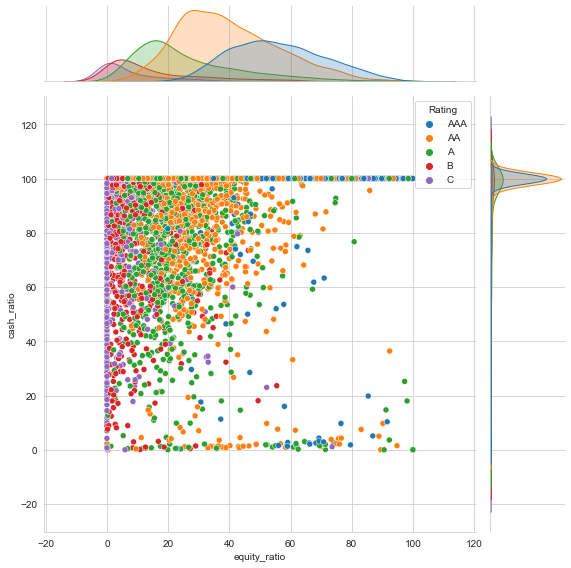

In [31]:
sns.jointplot(x='equity_ratio', y='cash_ratio', data=df ,hue='Rating', height=8)

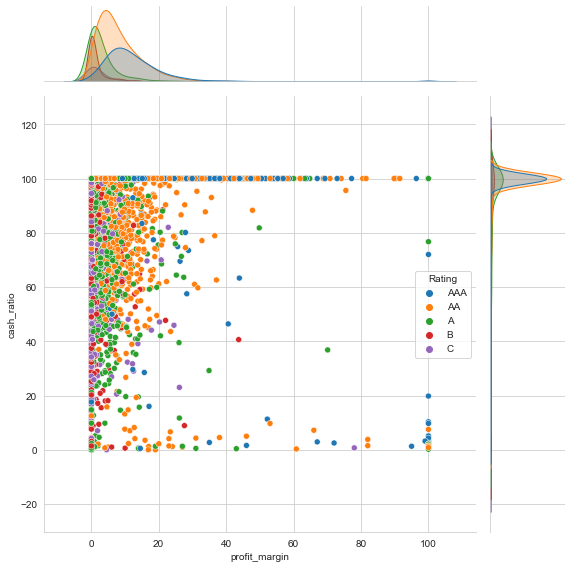

In [32]:
sns.jointplot(x='profit_margin', y='cash_ratio', data=df ,hue='Rating', height=8)

<AxesSubplot:xlabel='Rating', ylabel='equity_ratio'>

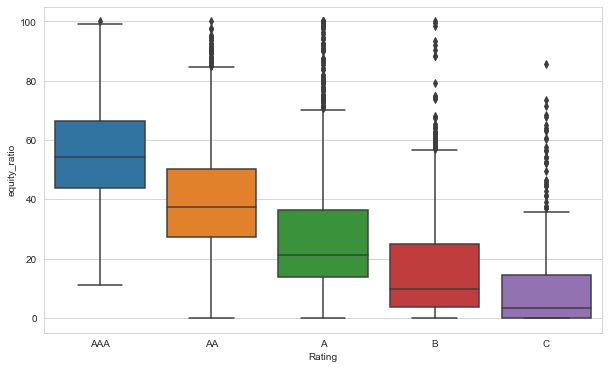

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='equity_ratio', data=df)

<AxesSubplot:xlabel='Rating', ylabel='profit_margin'>

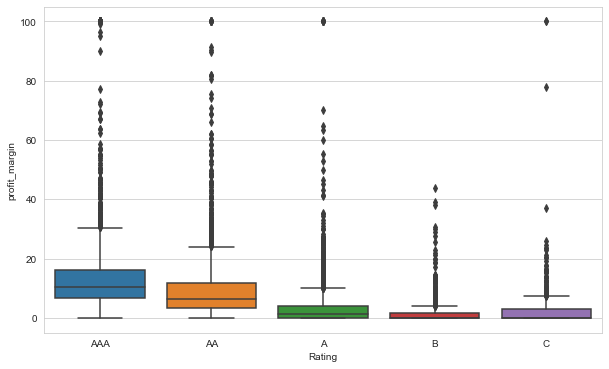

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='profit_margin', data=df)

<AxesSubplot:xlabel='Rating', ylabel='cash_ratio'>

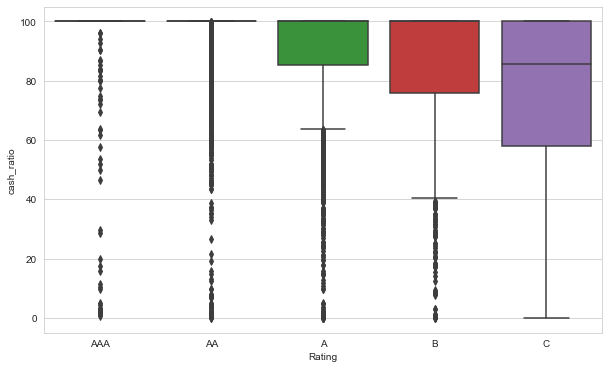

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='cash_ratio', data=df)

# Building the Model

In [36]:
df.head()

,payment_note_date,payment_note_amount,financials_date,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,net_sales-1,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
company_id,,,,,,,,,,,,,,,,,,,,,
1,0,6487.0,Aug,5677,8673.000000,8532.000000,7825.000000,5385.000000,5677,8663.00000,...,13.600000,10.300000,16.80000,0.000000,100.0,100.0,100.0,100.0,100.0,AAA
2,1,0.0,Dec,10617,8266.000000,9713.000000,9428.000000,7394.000000,10506,8254.00000,...,9.100000,15.900000,23.10000,16.800000,100.0,100.0,100.0,100.0,100.0,AA
3,1,0.0,Dec,7201,12695.806629,11561.806211,10679.515601,9770.775408,7201,12523.39662,...,13.441198,9.244291,7.38002,7.681723,100.0,100.0,100.0,100.0,100.0,AA
4,1,0.0,Apr,22629,20668.000000,24591.000000,23754.000000,23656.000000,22619,20667.00000,...,0.200000,2.900000,0.10000,1.900000,97.8,89.2,82.2,72.4,92.9,A
5,0,85539.0,Jul,10221,8358.000000,5865.000000,4038.000000,5128.000000,10216,8358.00000,...,14.600000,0.000000,0.00000,9.700000,100.0,100.0,100.0,100.0,100.0,AA


### Drop Financials date

In [37]:
df = df.drop('financials_date', axis=1)

### Convert Rating to numbers

In [38]:
df['Rating'].value_counts()

AA     4623
AAA    2784
A      2114
B       888
C       555
Name: Rating, dtype: int64

In [39]:
def convert_rating(rating):
    if rating == 'AAA':
        return 1
    if rating == 'AA':
        return 2
    if rating == 'A':
        return 3
    if rating == 'B':
        return 4
    if rating == 'C':
        return 5

In [40]:
df['Rating_num'] = df['Rating'].apply(convert_rating)

In [41]:
df['Rating_num'].value_counts()

2    4623
1    2784
3    2114
4     888
5     555
Name: Rating_num, dtype: int64

### Drop Rating

In [42]:
df = df.drop('Rating', axis=1)

# Train Test Split

In [43]:
X = df.drop('Rating_num', axis=1)
y = df['Rating_num']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=500)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

## Predictions

In [49]:
predictions = rfc.predict(X_test)

<AxesSubplot:ylabel='count'>

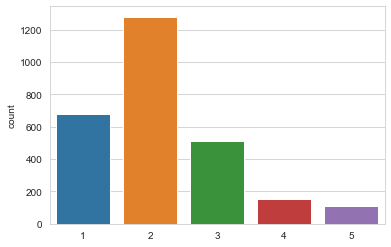

In [50]:
sns.countplot(x=predictions)

## Evaluate Predictions

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           1       0.79      0.72      0.75       738
           2       0.75      0.84      0.79      1135
           3       0.75      0.75      0.75       519
           4       0.83      0.63      0.72       205
           5       0.84      0.66      0.74       144

    accuracy                           0.77      2741
   macro avg       0.79      0.72      0.75      2741
weighted avg       0.77      0.77      0.76      2741



[[533 194  10   1   0]
 [131 955  46   2   1]
 [ 11 105 387   9   7]
 [  2  15  49 129  10]
 [  0  12  23  14  95]]


# Predict test.csv

In [53]:
df_test = pd.read_csv('test.csv', index_col='company_id')

In [54]:
df_test.head()

,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,revenue-2,...,profit_margin,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4
company_id,,,,,,,,,,,,,,,,,,,,,
10965,NaN,NaN,Dec-17,Dec-16,Dec-15,Dec-14,NaN,4617,3760.0,2774.0,...,23.1,9.5,-0.3,5.1,NaN,48.0,112.9,74.9,46.7,NaN
10966,NaN,NaN,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,5446,5529.0,5732.0,...,1.7,0.8,0.3,0.6,-1.3,30.2,35.2,44.9,48.6,39.7
10967,NaN,NaN,Apr-18,Apr-17,Apr-16,Apr-15,Apr-14,8087,6872.0,7200.0,...,20.0,11.3,15.9,21.8,13.4,273.9,239.3,296.9,631.8,568.1
10968,NaN,NaN,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,9507,7449.0,4940.0,...,25.9,23.1,11.7,5.8,12.5,115.6,89.9,102.5,80.8,86.2
10969,NaN,0.0,Jun-18,Jun-17,Jun-16,Jun-15,Jun-14,45618,48085.0,50221.0,...,13.2,9.8,18.0,10.5,14.6,190.2,181.1,186.9,151.6,158.7


In [55]:
df_test.isnull().sum()

payment_note_date                     2465
payment_note_amount                   1778
financials_date                          0
financials_date-1                       55
financials_date-2                      189
financials_date-3                      340
financials_date-4                      473
revenue                                  0
revenue-1                               55
revenue-2                              189
revenue-3                              340
revenue-4                              473
net_sales                                0
net_sales-1                             55
net_sales-2                            189
net_sales-3                            340
net_sales-4                            473
profit_after_net_financial_items         0
profit_after_net_financial_items-1      55
profit_after_net_financial_items-2     189
profit_after_net_financial_items-3     340
profit_after_net_financial_items-4     473
profit                                   0
profit-1   

## Preparing Data
### Creating dummy variable for payment note date

In [56]:
df_test['payment_note_date'] = pd.get_dummies(df_test['payment_note_date'].isnull(), drop_first=True)

### Set NaN values to 0 in payment note amount

In [57]:
df_test['payment_note_amount'] = df_test['payment_note_amount'].replace(to_replace=np.nan, value=0)

### Drop financials date

In [58]:
df_test = df_test.drop(['financials_date', 'financials_date-1', 'financials_date-2', 'financials_date-3', 'financials_date-4'], axis=1)

### Replacing all the other features missing values with the mean of the features

In [59]:
df_mean_feat = df_mean.mean()

In [60]:
#df_mean_feat

In [61]:
i = 1
while i < 5:
    df_test[f'revenue-{i}'] = df_test[f'revenue-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'revenue-{i}'])
    df_test[f'net_sales-{i}'] = df_test[f'net_sales-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'net_sales-{i}'])
    df_test[f'profit_after_net_financial_items-{i}'] = df_test[f'profit_after_net_financial_items-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'profit_after_net_financial_items-{i}'])
    df_test[f'profit-{i}'] = df_test[f'profit-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'profit-{i}'])
    df_test[f'assets-{i}'] = df_test[f'assets-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'assets-{i}'])
    df_test[f'lt_liabilities-{i}'] = df_test[f'lt_liabilities-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'lt_liabilities-{i}'])
    df_test[f'equity-{i}'] = df_test[f'equity-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'equity-{i}'])
    df_test[f'equity_ratio-{i}'] = df_test[f'equity_ratio-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'equity_ratio-{i}'])
    df_test[f'profit_margin-{i}'] = df_test[f'profit_margin-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'profit_margin-{i}'])
    df_test[f'cash_ratio-{i}'] = df_test[f'cash_ratio-{i}'].replace(to_replace=np.nan, value=df_mean_feat[f'cash_ratio-{i}'])
    i+=1

In [62]:
#df_test.isnull().sum()

### Fixing equity ratio, profit margin and cash ratio values

In [63]:
i = 1
while i < 5:
    df_test['equity_ratio'] = df_test['equity_ratio'].apply(fix_perc)
    df_test[f'equity_ratio-{i}'] = df_test[f'equity_ratio-{i}'].apply(fix_perc)
    df_test['profit_margin'] = df_test['profit_margin'].apply(fix_perc)
    df_test[f'profit_margin-{i}'] = df_test[f'profit_margin-{i}'].apply(fix_perc)
    df_test['cash_ratio'] = df_test['cash_ratio'].apply(fix_perc)
    df_test[f'cash_ratio-{i}'] = df_test[f'cash_ratio-{i}'].apply(fix_perc)
    i+=1

## Make Predictions on Test Data

In [64]:
pred = rfc.predict(df_test)

<AxesSubplot:ylabel='count'>

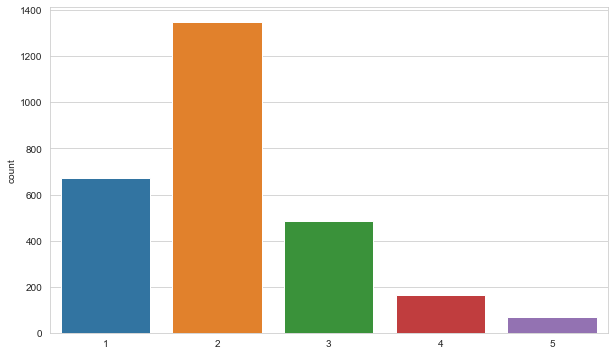

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x=pred)

In [66]:
df_test['Rating_num'] = pred

In [67]:
df_test.head()

,payment_note_date,payment_note_amount,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,net_sales-1,net_sales-2,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating_num
company_id,,,,,,,,,,,,,,,,,,,,,
10965,1,0.0,4617,3760.0,2774.0,1989.0,10700.812907,4081,3645.0,2619.0,...,9.5,0.0,5.1,0.0,48.0,100.0,74.9,46.7,100.0,3
10966,1,0.0,5446,5529.0,5732.0,5582.0,5164.000000,5510,5239.0,5665.0,...,0.8,0.3,0.6,0.0,30.2,35.2,44.9,48.6,39.7,3
10967,1,0.0,8087,6872.0,7200.0,6923.0,6845.000000,8031,6797.0,7200.0,...,11.3,15.9,21.8,13.4,100.0,100.0,100.0,100.0,100.0,1
10968,1,0.0,9507,7449.0,4940.0,4478.0,4966.000000,8874,7109.0,4940.0,...,23.1,11.7,5.8,12.5,100.0,89.9,100.0,80.8,86.2,2
10969,1,0.0,45618,48085.0,50221.0,35558.0,30520.000000,45304,47484.0,49508.0,...,9.8,18.0,10.5,14.6,100.0,100.0,100.0,100.0,100.0,1


In [68]:
def rating_convert(num):
    if num == 1:
        return 'AAA'
    if num == 2:
        return 'AA'
    if num == 3:
        return 'A'
    if num == 4:
        return 'B'
    if num == 5:
        return 'C'

In [69]:
df_test['Rating'] = df_test['Rating_num'].apply(rating_convert)

In [70]:
df_test.head()

,payment_note_date,payment_note_amount,revenue,revenue-1,revenue-2,revenue-3,revenue-4,net_sales,net_sales-1,net_sales-2,...,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating_num,Rating
company_id,,,,,,,,,,,,,,,,,,,,,
10965,1,0.0,4617,3760.0,2774.0,1989.0,10700.812907,4081,3645.0,2619.0,...,0.0,5.1,0.0,48.0,100.0,74.9,46.7,100.0,3,A
10966,1,0.0,5446,5529.0,5732.0,5582.0,5164.000000,5510,5239.0,5665.0,...,0.3,0.6,0.0,30.2,35.2,44.9,48.6,39.7,3,A
10967,1,0.0,8087,6872.0,7200.0,6923.0,6845.000000,8031,6797.0,7200.0,...,15.9,21.8,13.4,100.0,100.0,100.0,100.0,100.0,1,AAA
10968,1,0.0,9507,7449.0,4940.0,4478.0,4966.000000,8874,7109.0,4940.0,...,11.7,5.8,12.5,100.0,89.9,100.0,80.8,86.2,2,AA
10969,1,0.0,45618,48085.0,50221.0,35558.0,30520.000000,45304,47484.0,49508.0,...,18.0,10.5,14.6,100.0,100.0,100.0,100.0,100.0,1,AAA


In [71]:
#df_test.to_csv("test_final.csv")